In [12]:
def check_cycle_simple(r):
    x = 0.5  # начальное значение
    for _ in range(1000):
        x = r * x * (1 - x)
    print(f"проверка для r = {r}")
    for i in range(16):
        x = r * x * (1 - x)
        print(f"шаг {i+1}: {round(x, 4)}")
    print("\n")

check_cycle_simple(3.2) 
check_cycle_simple(3.5)
check_cycle_simple(3.56)

def get_cycle_length(r):
    x = 0.5
    for _ in range(2000):
        x = r * x * (1 - x) 
    tail = []
    for _ in range(100):
        x = r * x * (1 - x)
        tail.append(round(x, 4))
    # set() оставляет только уникальные значения
    unique_values = set(tail)
    return len(unique_values)

print("эксперимент:")
print(f"при r = 2.9  -> длина цикла m = {get_cycle_length(2.9)}")
print(f"при r = 3.2  -> длина цикла m = {get_cycle_length(3.2)}")
print(f"при r = 3.5  -> длина цикла m = {get_cycle_length(3.5)}")
print(f"при r = 3.56 -> длина цикла m = {get_cycle_length(3.56)}")
print(f"при r = 3.569 -> длина цикла m = {get_cycle_length(3.569)}")

проверка для r = 3.2
шаг 1: 0.7995
шаг 2: 0.513
шаг 3: 0.7995
шаг 4: 0.513
шаг 5: 0.7995
шаг 6: 0.513
шаг 7: 0.7995
шаг 8: 0.513
шаг 9: 0.7995
шаг 10: 0.513
шаг 11: 0.7995
шаг 12: 0.513
шаг 13: 0.7995
шаг 14: 0.513
шаг 15: 0.7995
шаг 16: 0.513


проверка для r = 3.5
шаг 1: 0.875
шаг 2: 0.3828
шаг 3: 0.8269
шаг 4: 0.5009
шаг 5: 0.875
шаг 6: 0.3828
шаг 7: 0.8269
шаг 8: 0.5009
шаг 9: 0.875
шаг 10: 0.3828
шаг 11: 0.8269
шаг 12: 0.5009
шаг 13: 0.875
шаг 14: 0.3828
шаг 15: 0.8269
шаг 16: 0.5009


проверка для r = 3.56
шаг 1: 0.8899
шаг 2: 0.3488
шаг 3: 0.8086
шаг 4: 0.5509
шаг 5: 0.8808
шаг 6: 0.3738
шаг 7: 0.8333
шаг 8: 0.4945
шаг 9: 0.8899
шаг 10: 0.3488
шаг 11: 0.8086
шаг 12: 0.5509
шаг 13: 0.8808
шаг 14: 0.3738
шаг 15: 0.8333
шаг 16: 0.4945


эксперимент:
при r = 2.9  -> длина цикла m = 1
при r = 3.2  -> длина цикла m = 2
при r = 3.5  -> длина цикла m = 4
при r = 3.56 -> длина цикла m = 8
при r = 3.569 -> длина цикла m = 32


**Для увеличения длины цикла в два раза значение r каждый раз нужно увеличивать на все меньшее и меньшее значение**
**Значения r уменьшаются не случайно, а в строгой пропорции: каждое следующий щаг примерно в 4.67 раз короче**
**Эта константа показывает ускорение к хаосу**



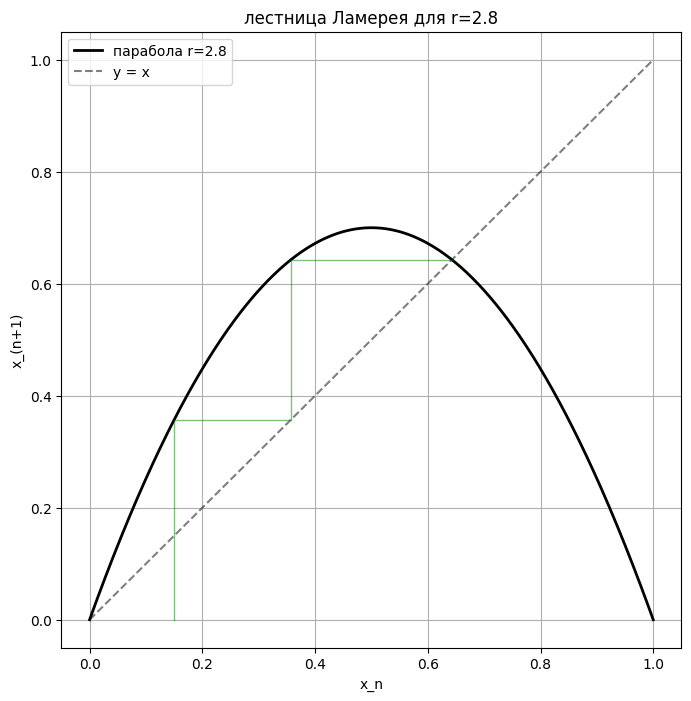

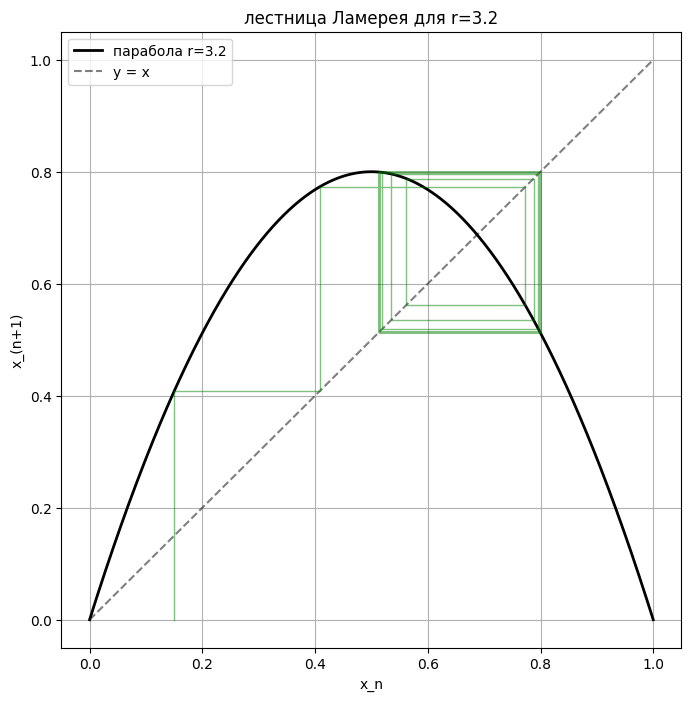

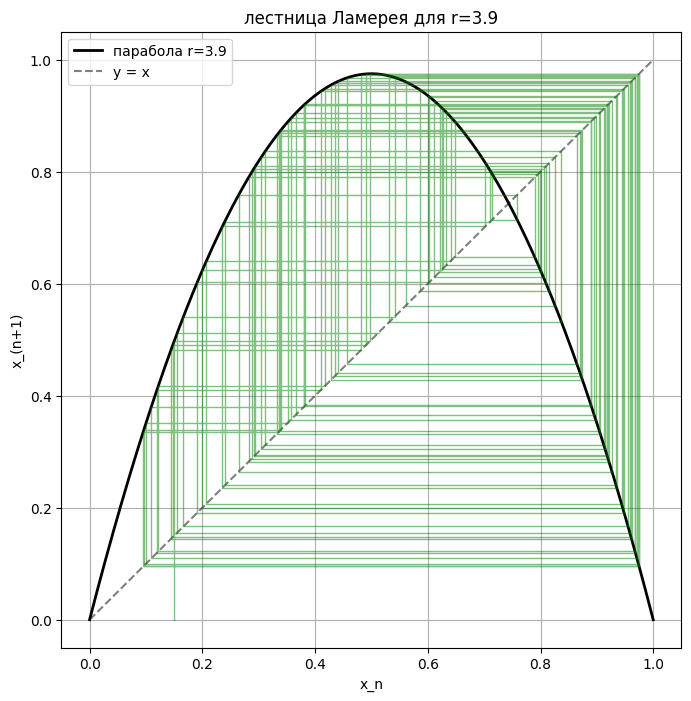

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_1(r, x0):
    # фон
    x = np.linspace(0, 1, 500)
    y = r * x * (1 - x)
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'k', linewidth=2, label=f'парабола r={r}') # парабола
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y = x') # диагональ
    # рисуем лестницу
    px = [x0] 
    py = [0]
    curr_x = x0
    for _ in range(100): # делаем 100 шагов
        # вертикально до параболы
        next_x = r * curr_x * (1 - curr_x)
        # добавляем точки для вертикальной линии
        px.append(curr_x)
        py.append(next_x) # старт с 0
        # горизонтально до диагонали
        px.append(next_x)
        py.append(next_x) # конец на диагонали  
        curr_x = next_x 
    # рисуем путь
    plt.plot(px, py, 'g', alpha=0.5, linewidth=1)
    plt.title(f"лестница Ламерея для r={r}")
    plt.xlabel("x_n")
    plt.ylabel("x_(n+1)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_1(r=2.8, x0=0.15) # сходится в точку
plot_1(r=3.2, x0=0.15) # цикл (Квадрат)
plot_1(r=3.9, x0=0.15) # хаос

# Выводы: Визуализация циклов различных порядков 
### 1. Цикл порядка $m=1$ (Устойчивая неподвижная точка)
* **Параметр:** r < 3 (например, r=2.8)
* **Визуальное описание:** График представляет собой лесенку, которая сходится в одну точку.
* **Физический смысл:** Это точка пересечения параболы и диагонали y=x. Система стремится к равновесию. Любое начальное возмущение затухает.

### 2. Цикл порядка $m=2$ (Предельный цикл периода 2)
* **Параметр:** 3 < r < 3.45 (например, r=3.2)
* **Визуальное описание:** Сходимость к одной точке исчезает. Вместо этого траектория формирует **замкнутый прямоугольник**. Линия бесконечно обходит 4 вершины этого прямоугольника, касаясь параболы в двух разных точках.
* **Физический смысл:** Стационарная точка (пересечение с диагональю) потеряла устойчивость. Система перешла в колебательный режим, поочередно принимая два значения.

### 3. Цикл порядка $m=4$ (Удвоение периода)
* **Параметр:** r > 3.5 (например, r = 3.9)
* **Визуальное описание:** Прямоугольник усложняется. Траектория превращается в практически хаотичную, которая касается параболы уже в **бесконечном количестве точке**. Траектория не замыкается
* **Физический смысл:** : Система находится в режиме динамического хаоса.

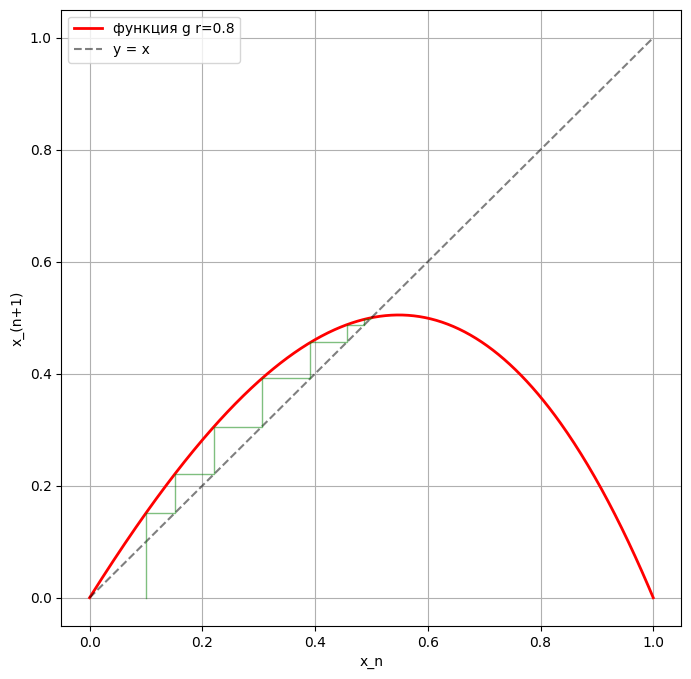

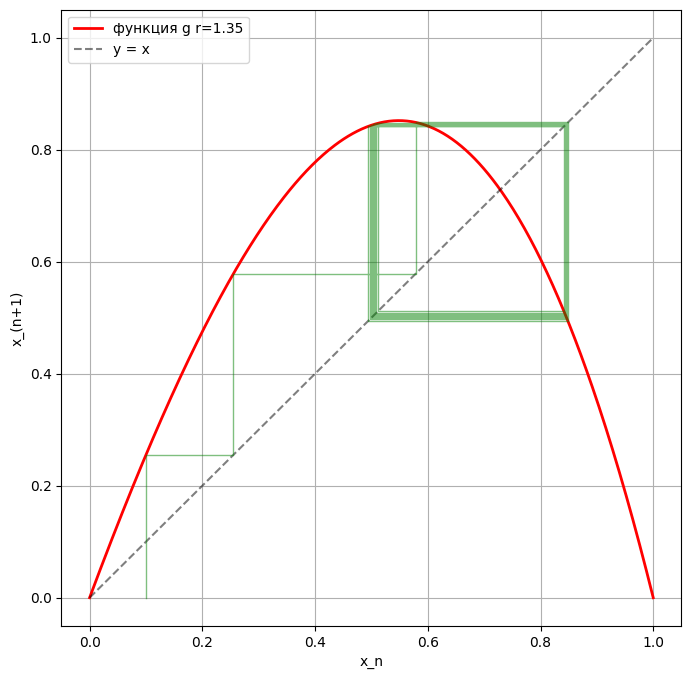

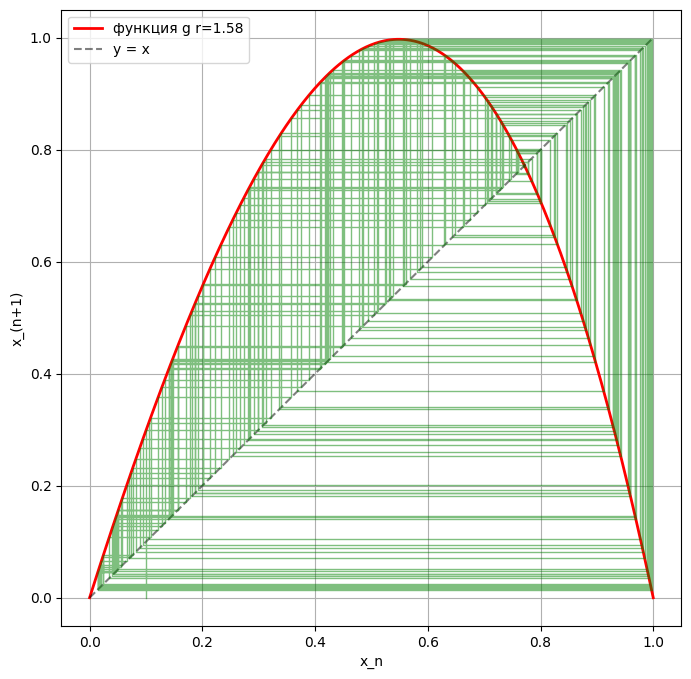

In [32]:
def g_func(r, x):
    return r * x * (1 - x) * (2 + x)

def plot_2(r):
    x0 = 0.1
    # фон
    x = np.linspace(0, 1, 500)
    plt.figure(figsize=(8, 8))
    y_2 = r * x * (1 - x) * (2 + x)
    plt.plot(x, y_2, 'r', linewidth=2, label=f'функция g r={r}') # функция g 
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y = x')
    # лестница
    px = [x0]
    py = [0]
    curr_x = x0
    for _ in range(200):
        next_x = g_func(r, curr_x)
        # вертикально
        px.append(curr_x)
        py.append(next_x)
        # горизонтально
        px.append(next_x)
        py.append(next_x)
        curr_x = next_x
    plt.plot(px, py, 'g', alpha=0.5, linewidth=1)
    plt.xlabel("x_n")
    plt.ylabel("x_(n+1)")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_2(0.8)
plot_2(1.35)
plot_2(1.58)

# Анализ длин циклов и сравнение с логистическим отображением

### 1. Экспериментальные значения длины цикла

* При значении параметра **r = 0.8** система стабилизируется в одной точке. Длина цикла **m = 1**.
* При увеличении параметра до **r = 1.35** возникают колебания между двумя значениями. Длина цикла **m = 2**.
* При приближении к **r ≈ 1.58** периодическая структура разрушается, и система переходит в режим хаоса.

### 2. Природа сходства с логистическим отображением
Несмотря на то, что исследуемая функция g(x) является кубической, а классическое логистическое отображение — квадратичным, их динамическое поведение **идентично**.

Это сходство обусловлено следующим:

1. Оба отображения переходят от порядка к хаосу по одному и тому же сценарию: последовательно удваивая длину цикла.
2.  **Геометрия циклов:** При построении лестницы Ламерея мы видим те же самые геометрические фигуры.